<a href="https://colab.research.google.com/github/pndang/Project_WHEL/blob/main/exploratory_analysis_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Phu Dang

Date: 02.21.2023

Mentor: Professor Niema Moshiri, Niema Lab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [ ]:
cd /content/drive/MyDrive/NIEMA_Lab/WHEL_Data/Preprocessed-Data

/content/drive/MyDrive/NIEMA_Lab/WHEL_Data/Preprocessed-Data


In [ ]:
!ls

bcep_tf.csv  ovrt.csv  ovrt_phu.csv


In [ ]:
bcep_tf = pd.read_csv("bcep_tf.csv")
bcep_tf.rename(columns={"Unnamed: 0": "og_idx", "mental health": "mentalhealth"}, inplace=True)
bcep_tf.head()

,og_idx,id,lutein_ovt,cryptox_ovt,lycopene_ovt,alphacar_ovt,betacar_ovt,intgrp,vitality,brcastatus,...,recur_flag,yrsdx_rand,yrsrand_endr,yrsdx_endr,yrsdx_endd,QOL,optimism,physhealth,mentalhealth,genhlth
0,0,1018,-0.0347,0.0303,-0.0820,0.0918,0.8330,3,1,0,...,0,1.382615,10.861054,12.243669,12.243669,93.500000,24.0,97.500,89.500000,90.0
1,1,1019,0.4003,0.0880,-0.0739,0.1937,0.3823,4,1,0,...,0,3.556468,10.861054,14.417522,14.417522,83.457031,16.0,88.750,78.164062,85.0
2,2,1022,0.0056,-0.0503,-0.2200,0.0528,0.3148,3,1,0,...,0,2.861054,10.861054,13.722108,13.722108,92.625000,17.0,96.250,89.000000,85.0
3,3,1026,-0.1215,-0.3689,-0.3149,0.0722,0.3063,4,1,0,...,0,1.336071,10.861054,12.197125,12.197125,74.832031,15.0,83.750,65.914062,65.0
4,4,1027,0.1232,0.1394,0.4131,0.0773,0.9563,4,1,0,...,0,3.279945,10.861054,14.140999,14.140999,79.000000,17.0,85.625,72.375000,85.0


In [ ]:
bcep_tf.shape

(1937, 31)

In [ ]:
def rolling_var(dataset, x, target, range):

  min = dataset[x].min()
  max = dataset[x].max()

  x_values = np.arange(min, max, 1)
  variances = []

  for i in x_values:
    subset = dataset.query(f'{i-range}<={x}<={i+range}')
    var = np.var(subset[target])
    variances.append(var)
  
  return x_values, variances


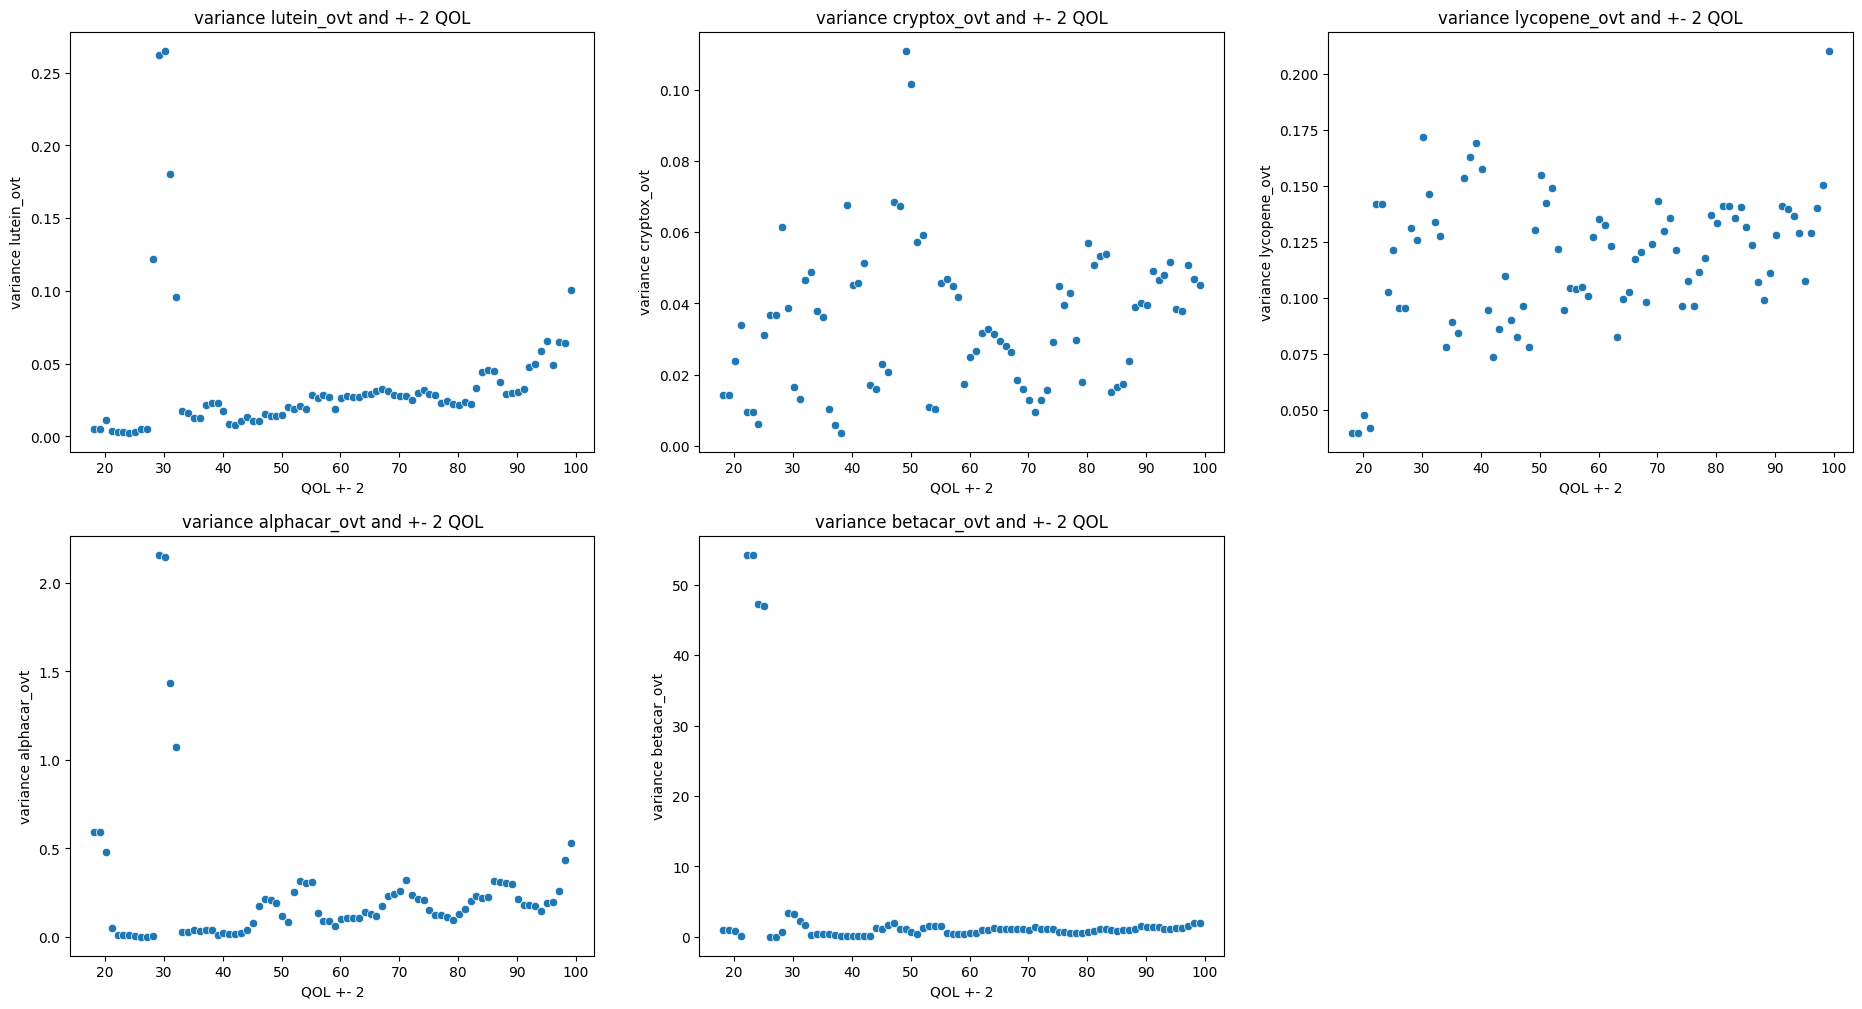

In [ ]:
# Plotting the QOL intervals and variances

idx = 1
plt.figure(figsize=(23, 12))
target_col = ['lutein_ovt', 'cryptox_ovt', 'lycopene_ovt', 'alphacar_ovt', 'betacar_ovt']
for col in target_col:
  x, y = rolling_var(bcep_tf, 'QOL', col, 2)
  plt.subplot(2, 3, idx)
  sns.scatterplot(x=x, y=y)
  plt.title(f'variance {col} and +- 2 QOL')
  plt.xlabel('QOL +- 2')
  plt.ylabel(f'variance {col}')
  idx += 1

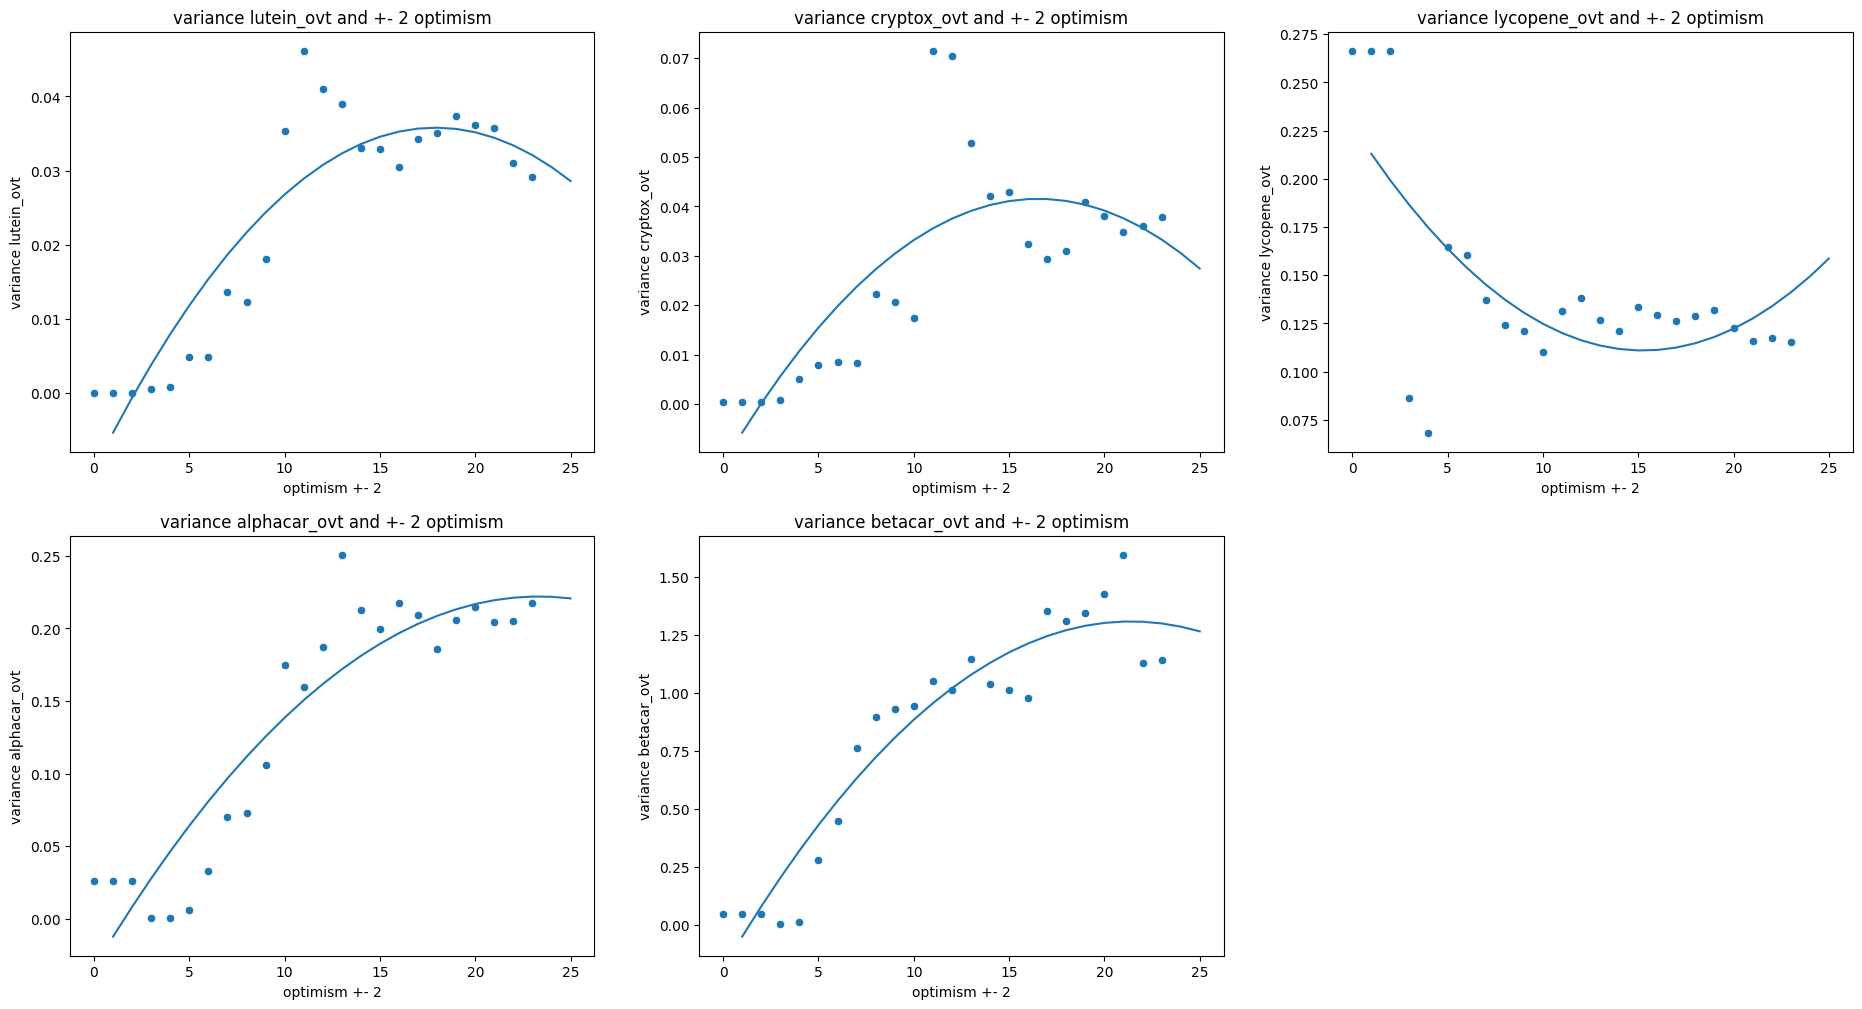

In [ ]:
# Plotting the optimism intervals and variances

idx = 1
plt.figure(figsize=(23, 12))
target_col = ['lutein_ovt', 'cryptox_ovt', 'lycopene_ovt', 'alphacar_ovt', 'betacar_ovt']
for col in target_col:
  x, y = rolling_var(bcep_tf, 'optimism', col, 2)
  plt.subplot(2, 3, idx)
  sns.scatterplot(x=x, y=y)
  # data = pd.DataFrame({'x':x, 'y':y})
  # sns.lmplot(x='x', y='y', data=data, order=2)
  line = np.linspace(1, 25, 25)
  model = np.poly1d(np.polyfit(x, y, 2))
  plt.plot(line, model(line))
  plt.title(f'variance {col} and +- 2 optimism')
  plt.xlabel('optimism +- 2')
  plt.ylabel(f'variance {col}')
  idx += 1

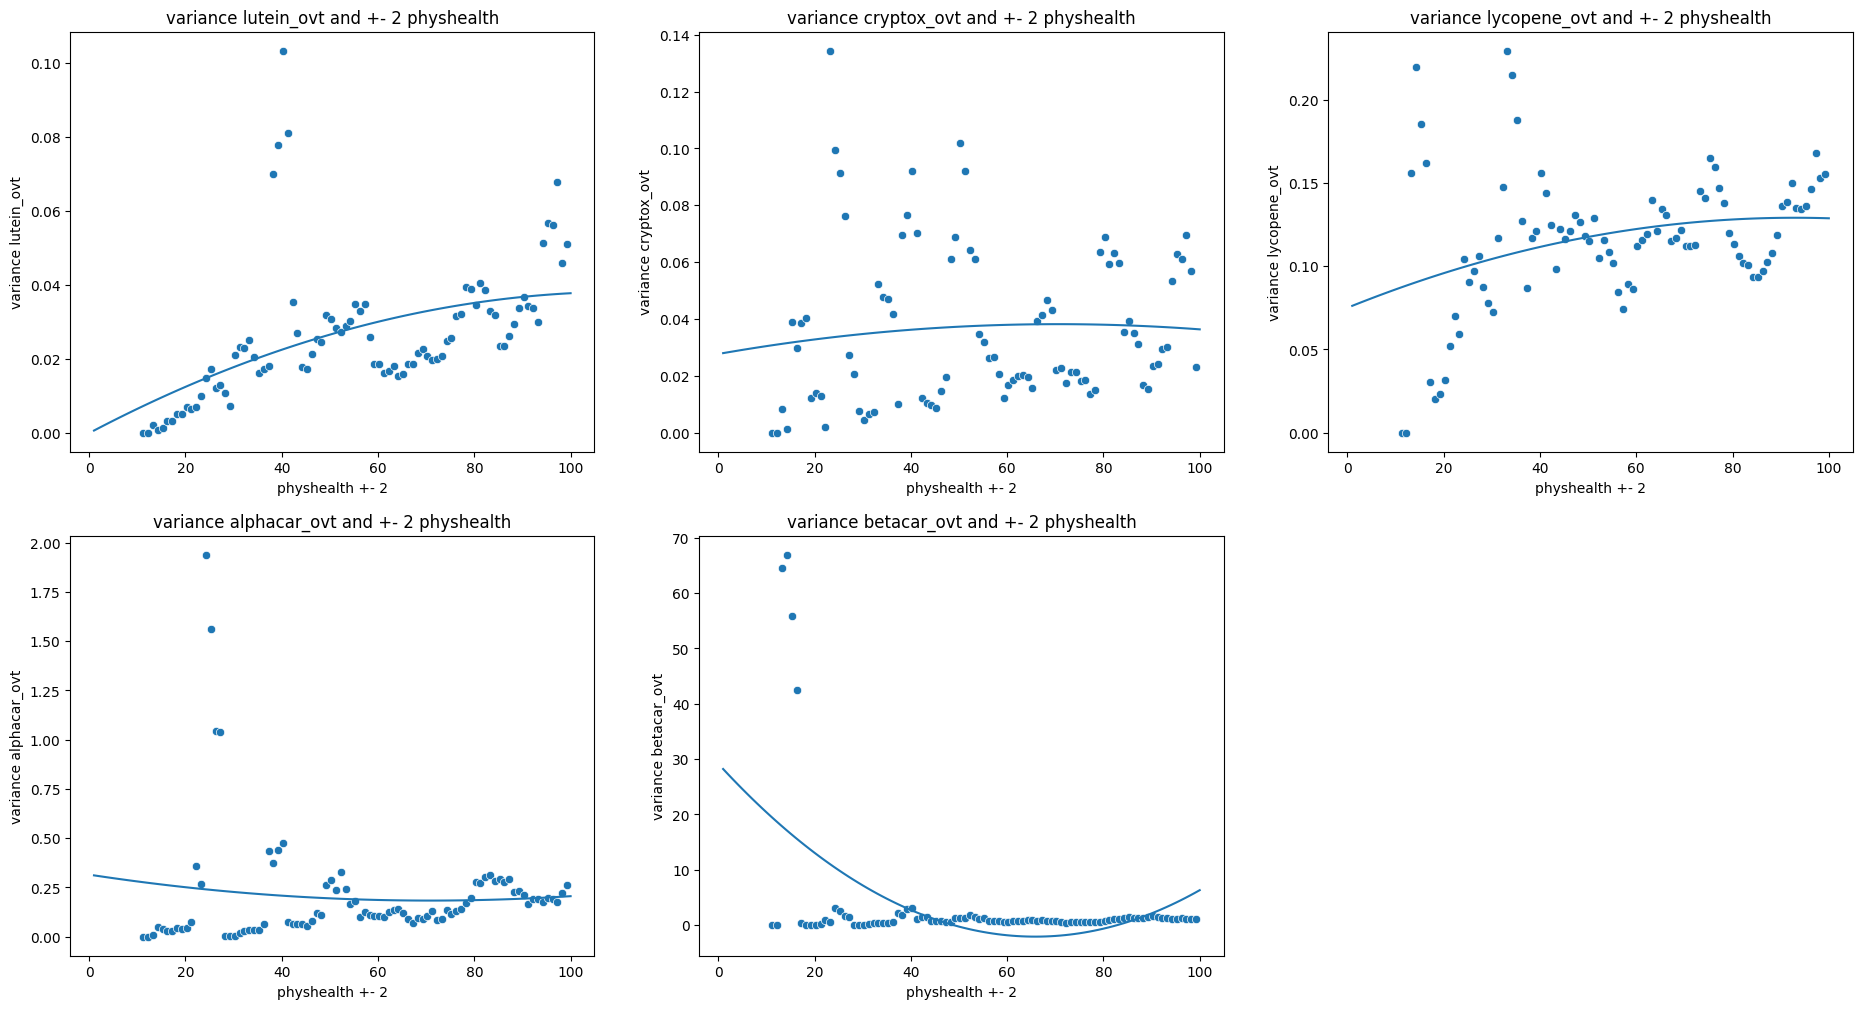

In [ ]:
# Plotting the physical health intervals and variances

idx = 1
plt.figure(figsize=(23, 12))
target_col = ['lutein_ovt', 'cryptox_ovt', 'lycopene_ovt', 'alphacar_ovt', 'betacar_ovt']
for col in target_col:
  x, y = rolling_var(bcep_tf, 'physhealth', col, 2)
  plt.subplot(2, 3, idx)
  sns.scatterplot(x=x, y=y)
  line = np.linspace(1, 100, 100)
  model = np.poly1d(np.polyfit(x, y, 2))
  plt.plot(line, model(line))
  plt.title(f'variance {col} and +- 2 physhealth')
  plt.xlabel('physhealth +- 2')
  plt.ylabel(f'variance {col}')
  idx += 1

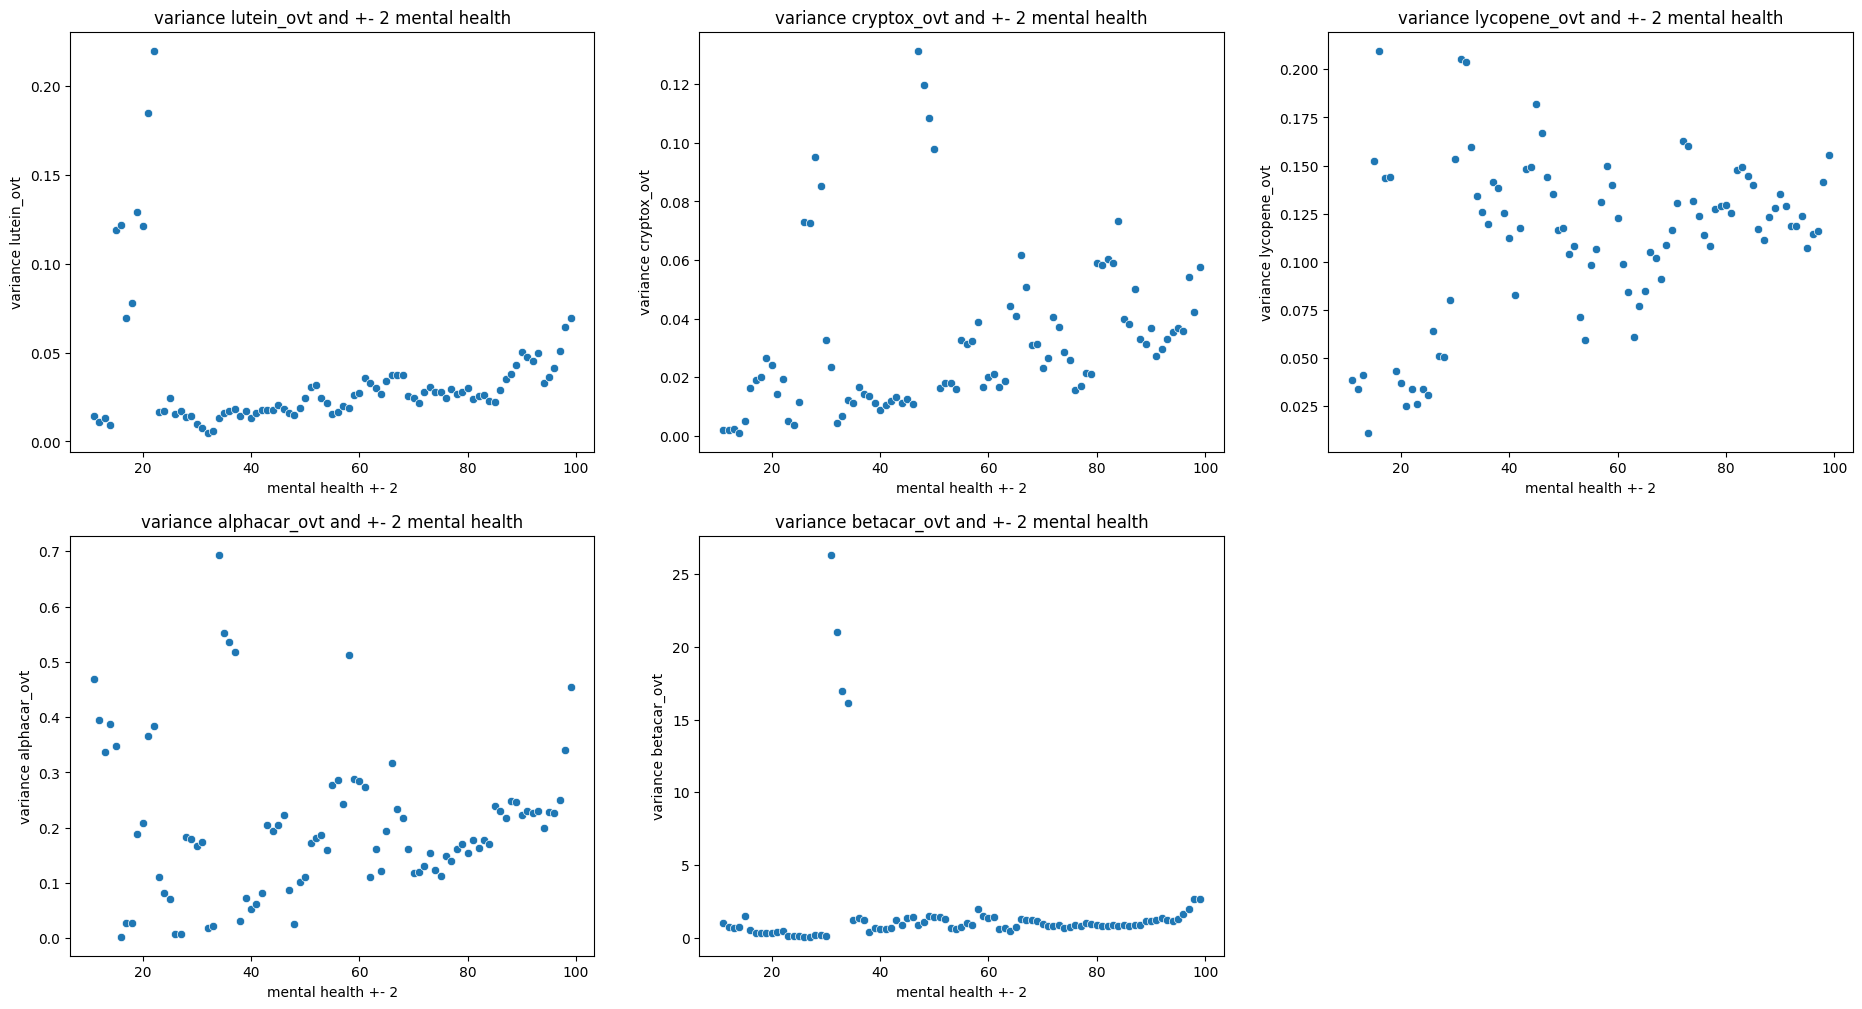

In [ ]:
# Plotting the mental health intervals and variances

idx = 1
plt.figure(figsize=(23, 12))
target_col = ['lutein_ovt', 'cryptox_ovt', 'lycopene_ovt', 'alphacar_ovt', 'betacar_ovt']
for col in target_col:
  x, y = rolling_var(bcep_tf, 'mentalhealth', col, 2)
  plt.subplot(2, 3, idx)
  sns.scatterplot(x=x, y=y)
  plt.title(f'variance {col} and +- 2 mental health')
  plt.xlabel('mental health +- 2')
  plt.ylabel(f'variance {col}')
  idx += 1

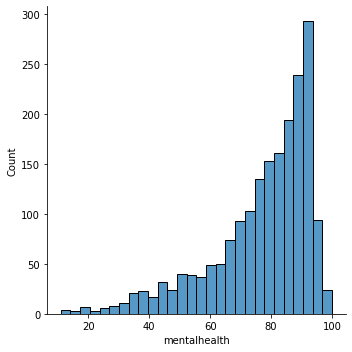

In [ ]:
sns.displot(x=bcep_tf['mentalhealth'])

In [ ]:
bcep_tf['mentalhealth'].min()

11.0

In [ ]:
bcep_tf.columns

Index(['og_idx', 'id', 'lutein_ovt', 'cryptox_ovt', 'lycopene_ovt',
       'alphacar_ovt', 'betacar_ovt', 'intgrp', 'vitality', 'brcastatus',
       'othcstatus', 'brcacontribute', 'Year_Dx', 'grade', 'grade2', 'grade3',
       'grademiss', 'newstage', 'stage2', 'stage3', 'site0', 'recur_flag',
       'yrsdx_rand', 'yrsrand_endr', 'yrsdx_endr', 'yrsdx_endd', 'QOL',
       'optimism', 'physhealth', 'mentalhealth', 'genhlth'],
      dtype='object')

In [ ]:
bcep_tf.dtypes

og_idx              int64
id                  int64
lutein_ovt        float64
cryptox_ovt       float64
lycopene_ovt      float64
alphacar_ovt      float64
betacar_ovt       float64
intgrp              int64
vitality            int64
brcastatus          int64
othcstatus        float64
brcacontribute      int64
Year_Dx             int64
grade               int64
grade2              int64
grade3              int64
grademiss           int64
newstage            int64
stage2              int64
stage3              int64
site0               int64
recur_flag          int64
yrsdx_rand        float64
yrsrand_endr      float64
yrsdx_endr        float64
yrsdx_endd        float64
QOL               float64
optimism          float64
physhealth        float64
mentalhealth      float64
genhlth           float64
dtype: object

In [ ]:
# Importing dataset containing changes in patients' biomarkers over time

ovrt_phu = pd.read_csv("ovrt_phu.csv")
ovrt_phu.drop(columns=['Unnamed: 0', 'brcastatus'], inplace=True)
ovrt_phu

,ID,QOL_ovt,energy_ovt,genhlth_ovt,optimism_ovt,pain_ovt,socfctn_ovt,brcastatus_binary,lutein_ovt,cryptox_ovt,lycopene_ovt,alphacar_ovt,betacar_ovt
0,1018,-15.750000,5.0,0.0,0.0,-37.5,-12.5,0,-0.0347,0.0303,-0.0820,0.0918,0.8330
1,1019,1.855469,15.0,-15.0,0.0,-12.5,0.0,0,0.4003,0.0880,-0.0739,0.1937,0.3823
2,1022,-2.312500,0.0,-10.0,-2.0,-12.5,0.0,0,0.0056,-0.0503,-0.2200,0.0528,0.3148
3,1026,-7.769531,5.0,-5.0,2.0,0.0,-37.5,0,-0.1215,-0.3689,-0.3149,0.0722,0.3063
4,1027,9.625000,20.0,0.0,-1.0,12.5,37.5,0,0.1232,0.1394,0.4131,0.0773,0.9563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,13241,1.437500,5.0,5.0,-1.0,12.5,0.0,0,0.0065,0.0827,0.4094,0.0154,0.2861
1840,13242,2.187500,5.0,5.0,2.0,-12.5,0.0,0,0.0932,-0.1789,0.2133,0.1499,0.8042
1841,13243,9.937500,15.0,10.0,1.0,12.5,0.0,0,-0.0045,0.1245,-0.1687,0.0116,-0.1035
1842,13244,8.500000,0.0,-20.0,1.0,25.0,0.0,0,-0.2045,-0.0240,-0.0402,-0.1501,-0.7837


In [ ]:
cd /content/drive/MyDrive/NIEMA_Lab/WHEL_Data/Data-Leena

/content/drive/MyDrive/NIEMA_Lab/WHEL_Data/Data-Leena


In [ ]:
# Importing Leena's datasets containing changes in patients' biomarkers over time

ovrt_leena = pd.read_csv("all_merged_stat.csv")
ovrt_leena.rename(columns={'id': 'ID'}, inplace=True)
ovrt_leena

,ID,recurrence,heightcm_ovt,weightkg_ovt,bmi_ovt,waistcm_ovt,hipcm_ovt,pulse30_ovt,systolic_ovt,diastolic_ovt,...,water_ovt,anim. protein_ovt,veg prot_ovt,vit k_ovt,trans fat acids_ovt,beta-carot_ovt,alpha-carot_ovt,beta-cryptox_ovt,lut + zeax_ovt,lycopene_ovt
0,1245,0,-1.10001,2.800002,1.463734,6.299998,0.000000,3,-5,7.0,...,193.992493,-1.905000,8.297500,91.972500,-0.3525,1399.397461,24.567507,54.597500,1790.035065,250.457520
1,1253,0,-0.20000,1.900000,0.808199,-4.000000,0.000000,-2,-3,-2.0,...,130.009460,-2.392500,-1.211906,-35.345476,-0.0725,12658.972900,8501.656815,68.522501,973.394165,33727.265015
2,1256,0,-2.00000,-4.800003,-1.057357,-2.999997,-7.500000,2,17,19.0,...,722.049988,-5.290000,-6.132500,7.219999,-0.4350,-311.827454,248.392479,15.737500,-347.647522,-1278.749996
3,1265,0,-1.50000,2.500000,1.298224,8.699997,1.200000,1,-20,-12.0,...,499.857483,-38.457500,1.315000,34.244999,-1.4150,18381.732422,8353.942706,61.490000,2007.082550,26804.000000
4,1266,0,-0.39999,2.800000,1.033011,2.900000,3.000000,4,-14,-13.0,...,299.345032,35.095001,-5.087500,26.660002,1.3200,-5628.977448,-1542.992467,312.769993,2945.134918,4928.824951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,13237,0,-0.60000,-1.700001,-0.580790,-1.500000,-1.800003,-2,13,3.0,...,778.665039,-15.582501,-2.377500,28.867503,-4.2725,953.305054,964.039978,76.027504,299.722534,17455.123047
752,13241,0,-0.89999,-1.250000,-0.157264,2.000000,-0.500000,0,12,3.5,...,-394.652527,8.437500,-2.780000,-3.692498,0.9900,-1166.187500,458.790023,-1468.800001,-799.239998,-7753.884999
753,13242,0,-0.80000,3.300000,1.454823,8.000000,-2.500000,-8,7,-3.0,...,-738.780029,-34.210000,5.542500,-16.477497,0.3250,-2668.910055,-193.804963,-299.970001,-1525.382530,1057.294678
754,13243,0,0.20000,4.199997,1.519204,5.000000,-3.000000,4,-32,-2.0,...,392.342163,-40.800000,3.721312,122.134993,-3.4975,5834.960815,1415.401793,249.318362,3406.976135,20269.307617


In [ ]:
ovrt_leena.shape

(756, 57)

In [ ]:
# Merging two datasets containing changes over time data

ovrt = ovrt_phu.merge(right=ovrt_leena, how='inner', on='ID')
ovrt

,ID,QOL_ovt,energy_ovt,genhlth_ovt,optimism_ovt,pain_ovt,socfctn_ovt,brcastatus_binary,lutein_ovt,cryptox_ovt,...,water_ovt,anim. protein_ovt,veg prot_ovt,vit k_ovt,trans fat acids_ovt,beta-carot_ovt,alpha-carot_ovt,beta-cryptox_ovt,lut + zeax_ovt,lycopene_ovt_y
0,1245,-32.312500,-20.0,-40.0,-2.0,-12.5,-50.0,0,-0.1697,-0.0465,...,193.992493,-1.905000,8.297500,91.972500,-0.3525,1399.397461,24.567507,54.597500,1790.035065,250.457520
1,1256,-36.687500,-5.0,10.0,-3.0,-50.0,-37.5,0,0.0980,-0.0966,...,722.049988,-5.290000,-6.132500,7.219999,-0.4350,-311.827454,248.392479,15.737500,-347.647522,-1278.749996
2,1265,-6.312500,-5.0,-10.0,2.0,-12.5,0.0,0,0.0349,-0.1795,...,499.857483,-38.457500,1.315000,34.244999,-1.4150,18381.732422,8353.942706,61.490000,2007.082550,26804.000000
3,1266,0.437500,-10.0,0.0,2.0,25.0,-12.5,0,-0.1125,-0.1744,...,299.345032,35.095001,-5.087500,26.660002,1.3200,-5628.977448,-1542.992467,312.769993,2945.134918,4928.824951
4,1276,30.646484,30.0,5.0,-1.0,25.0,37.5,0,0.0766,0.0213,...,51.471191,4.437499,-1.353750,-67.597503,0.7600,49091.856445,28144.247949,284.864999,92.692444,-1542.129974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,13237,-2.875000,5.0,-15.0,1.0,0.0,0.0,0,-0.4909,0.0686,...,778.665039,-15.582501,-2.377500,28.867503,-4.2725,953.305054,964.039978,76.027504,299.722534,17455.123047
651,13241,1.437500,5.0,5.0,-1.0,12.5,0.0,0,0.0065,0.0827,...,-394.652527,8.437500,-2.780000,-3.692498,0.9900,-1166.187500,458.790023,-1468.800001,-799.239998,-7753.884999
652,13242,2.187500,5.0,5.0,2.0,-12.5,0.0,0,0.0932,-0.1789,...,-738.780029,-34.210000,5.542500,-16.477497,0.3250,-2668.910055,-193.804963,-299.970001,-1525.382530,1057.294678
653,13243,9.937500,15.0,10.0,1.0,12.5,0.0,0,-0.0045,0.1245,...,392.342163,-40.800000,3.721312,122.134993,-3.4975,5834.960815,1415.401793,249.318362,3406.976135,20269.307617


In [ ]:
ovrt.shape

(655, 69)

In [ ]:
ovrt.columns

Index(['ID', 'QOL_ovt', 'energy_ovt', 'genhlth_ovt', 'optimism_ovt',
       'pain_ovt', 'socfctn_ovt', 'brcastatus_binary', 'lutein_ovt',
       'cryptox_ovt', 'lycopene_ovt_x', 'alphacar_ovt', 'betacar_ovt',
       'recurrence', 'heightcm_ovt', 'weightkg_ovt', 'bmi_ovt', 'waistcm_ovt',
       'hipcm_ovt', 'pulse30_ovt', 'systolic_ovt', 'diastolic_ovt',
       'anti-est_use_ovt', 'anti-estro_type_ovt', '% protein_ovt', '% fat_ovt',
       '% carb_ovt', '% alcohol_ovt', 'caffeine_ovt', 'calcium_ovt',
       'iron_ovt', 'magnesium_ovt', 'phosphorus_ovt', 'potassium_ovt',
       'sodium_ovt', 'zinc_ovt', 'copper_ovt', 'selenium_ovt', 'alpha-toc_ovt',
       'gamma-toc_ovt', 'vit d_ovt', 'vitamin c_ovt', 'thiamin_ovt',
       'riboflavin_ovt', 'niacin_ovt', 'folacin_ovt', 'panto. acid_ovt',
       'vit b6_ovt', 'vit b12_ovt', 'cholesterol_ovt', 'diet fiber_ovt',
       'soluble fiber_ovt', 'insol. fiber_ovt', 'starch_ovt', 'sucrose_ovt',
       'galactose_ovt', 'fructose_ovt', 'lactose_ovt

In [ ]:
ovrt[ovrt['ID'] == 1276]['lycopene_ovt_y']

4   -1542.129974
Name: lycopene_ovt_y, dtype: float64

<AxesSubplot:xlabel='alphacar_ovt', ylabel='alpha-carot_ovt'>

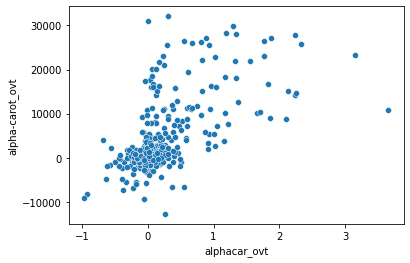

In [ ]:
sns.scatterplot(data=ovrt, x='alphacar_ovt', y='alpha-carot_ovt')

<AxesSubplot:xlabel='betacar_ovt', ylabel='beta-carot_ovt'>

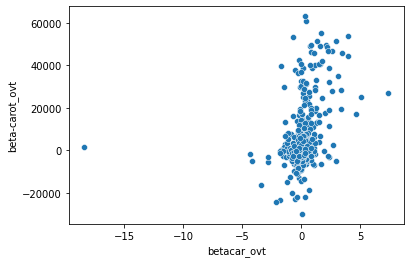

In [ ]:
sns.scatterplot(data=ovrt, x='betacar_ovt', y='beta-carot_ovt')

<AxesSubplot:xlabel='bmi_ovt', ylabel='cholesterol_ovt'>

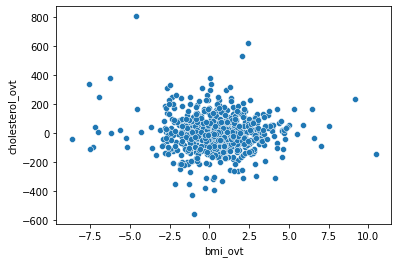

In [ ]:
sns.scatterplot(data=ovrt, x='bmi_ovt', y='cholesterol_ovt')

<AxesSubplot:xlabel='weightkg_ovt', ylabel='bmi_ovt'>

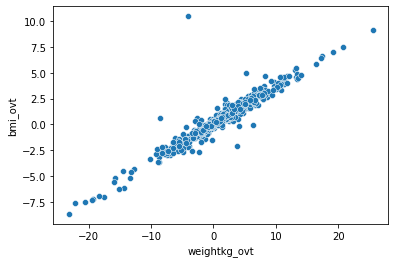

In [ ]:
sns.scatterplot(data=ovrt, x='weightkg_ovt', y='bmi_ovt')

<AxesSubplot:xlabel='systolic_ovt', ylabel='diastolic_ovt'>

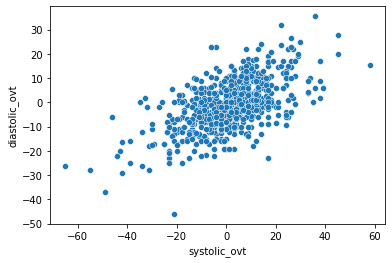

In [ ]:
sns.scatterplot(data=ovrt, x='systolic_ovt', y='diastolic_ovt')

<AxesSubplot:xlabel='water_ovt', ylabel='% alcohol_ovt'>

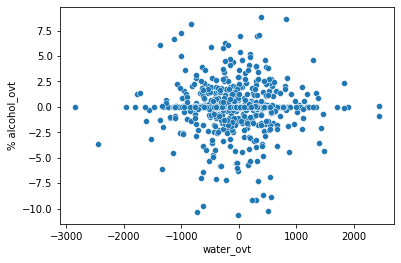

In [ ]:
sns.scatterplot(data=ovrt, x='water_ovt', y='% alcohol_ovt')

In [ ]:
ovrt.dtypes

ID                    int64
QOL_ovt             float64
energy_ovt          float64
genhlth_ovt         float64
optimism_ovt        float64
                     ...   
beta-carot_ovt      float64
alpha-carot_ovt     float64
beta-cryptox_ovt    float64
lut + zeax_ovt      float64
lycopene_ovt_y      float64
Length: 69, dtype: object

In [ ]:
# sanity check

set(ovrt['recurrence'] - ovrt['brcastatus_binary'])

{0}

In [ ]:
ovrt.drop(columns=['brcastatus_binary'], inplace=True)

In [ ]:
# Exporting ovrt to G Drive

path = '/content/drive/MyDrive/NIEMA_Lab/WHEL_Data/Preprocessed-Data/ovrt.csv'

with open(path, 'w') as f:
  ovrt.to_csv(f)

In [ ]:
ovrt.shape

(655, 68)